In [1]:
## Follow the Guide to set up the connection
## https://cloud.google.com/bigquery/docs/visualize-jupyter

In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../MelbDatathon2018/Auth/Republic of Data 2018-3f4dcd98a279.json"

def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

%matplotlib inline

In [3]:
# Run this to test the connection
implicit()

[<Bucket: dataprep-staging-abb5d66a-134b-4c90-9774-b91f26c0f3f6>, <Bucket: republic-of-data-original-data>]


In [4]:
%load_ext google.cloud.bigquery

In [5]:
%%bigquery df_count
SELECT EXTRACT(YEAR FROM datetime) AS Year, COUNT(DISTINCT CardID) AS Count FROM `republic-of-data-2018.data.samp_0_scan_off`
GROUP BY EXTRACT(YEAR FROM datetime)

,Year,Count
0,2016,698651
1,2017,725368
2,2018,539306
3,2015,450475


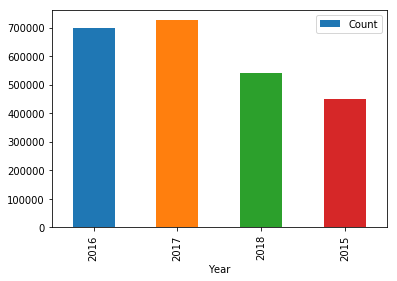

In [6]:
df_count.plot(kind='bar', x='Year', y='Count');